C:\Users\ELXMA\AppData\Local\Temp\ipykernel_15628\22808367.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pnd
C:\Users\ELXMA\AppData\Local\Temp\ipykernel_15628\22808367.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  obs=pnd.read_csv("SEEING_OBS.dat",delim_whitespace=True,header=None,names=["Año","Mes","Día","Hora","Segundo","Seeing Obs"])
C:\Users\ELXMA\AppData\Local\Temp\ipykernel_15628\22808367.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be remove

El promedio observado es de :   0.8678036175115208
El promedio pronosticado es de :   0.8048122580645161
El valor del RMSE es :   0.35369211228766506


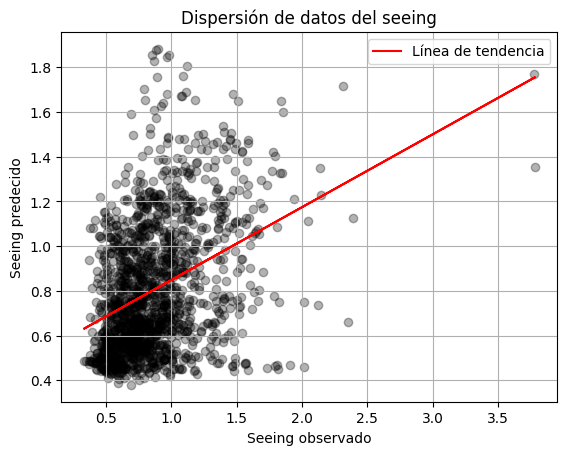

El error del seeing es bajo


In [1]:

import pandas as pnd
import numpy as np
import matplotlib.pyplot as plt

#a)

#CARGAR DATOS

obs=pnd.read_csv("SEEING_OBS.dat",delim_whitespace=True,header=None,names=["Año","Mes","Día","Hora","Segundo","Seeing Obs"])
wrf=pnd.read_csv("SEEING_WRF.dat",delim_whitespace=True,header=None,names=["Año","Mes","Día","Hora","Segundo","Seeing Wrf"])

#DATOS DEL SEEING 

seeingobs=obs["Seeing Obs"]
seeingwrf=wrf["Seeing Wrf"]

#b)

# CREAR FUNCIÓN PARA CALCULAR PROMEDIO

def promedio(data):
    return np.mean(data)

promedio_obs=promedio(seeingobs);promedio_wrf=promedio(seeingwrf)
print("El promedio observado es de :"," ",promedio_obs)
print("El promedio pronosticado es de :"," ",promedio_wrf)

#c) 
def RMSE_CALUCLATOR(observado,predecido):
    return np.sqrt(np.mean((observado-predecido)**2))
RMSE=RMSE_CALUCLATOR(seeingobs,seeingwrf)
print("El valor del RMSE es :"," ",RMSE)

#d)

#GRÁFICO CON SCATTER Y LINEA DE TENDENCIA
plt.scatter(seeingobs,seeingwrf,alpha=0.3,color="black")
plt.title("Dispersión de datos del seeing")
plt.xlabel("Seeing observado")
plt.ylabel("Seeing predecido")
plt.grid()

#CALCULAR LINEA DE TENDENCIA
coeff = np.polyfit(seeingobs, seeingwrf, 1)  # 1=linear

m = coeff[0]
b = coeff[1]

seeingwrftrend = m * seeingobs + b
plt.plot(seeingobs, seeingwrftrend, color="red",
         label="Línea de tendencia")
plt.legend()
plt.show()

#e) CALCULAR ERROR

if RMSE<1.0:
    print("El error del seeing es bajo")
elif RMSE<2:
    print("El error del pronóstico del seeing es promedio")
else:
    print("El error del pronóstico del seeing es alto")



